In [64]:
#DS imports
import pandas as pd
import numpy as np

from requests import get
from bs4 import BeautifulSoup
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests
import re
import time
import unicodedata
import markdown
import nltk
from sklearn.model_selection import train_test_split

#Visualization
import seaborn as sns
import matplotlib as plt
from wordcloud import WordCloud
from matplotlib import pyplot as plt

from env import github_token, github_username
from importlib import reload

# Acquire

In [2]:
"""
A module for obtaining repo readme and language data from the github API.
Before using this module, read through it, and follow the instructions marked
TODO.
After doing so, run it like this:
    python acquire.py
To create the `data.json` file that contains the data.
"""

# TODO: Make a github personal access token.
#     1. Go here and generate a personal access token: https://github.com/settings/tokens
#        You do _not_ need select any scopes, i.e. leave all the checkboxes unchecked
#     2. Save it in your env.py file under the variable `github_token`
# TODO: Add your github username to your env.py file under the variable `github_username`
# TODO: Add more repositories to the `REPOS` list below.

REPOS = [
    "gocodeup/codeup-setup-script",
    "gocodeup/movies-application",
    "torvalds/linux",
]

headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

if headers["Authorization"] == "token " or headers["User-Agent"] == "":
    raise Exception(
        "You need to follow the instructions marked TODO in this script before trying to use it"
    )


def github_api_request(url: str) -> Union[List, Dict]:
    response = requests.get(url, headers=headers)
    response_data = response.json()
    if response.status_code != 200:
        raise Exception(
            f"Error response from github api! status code: {response.status_code}, "
            f"response: {json.dumps(response_data)}"
        )
    return response_data


def get_repo_language(repo: str) -> str:
    url = f"https://api.github.com/repos/{repo}"
    repo_info = github_api_request(url)
    if type(repo_info) is dict:
        repo_info = cast(Dict, repo_info)
        if "language" not in repo_info:
            raise Exception(
                "'language' key not round in response\n{}".format(json.dumps(repo_info))
            )
        return repo_info["language"]
    raise Exception(
        f"Expecting a dictionary response from {url}, instead got {json.dumps(repo_info)}"
    )


def get_repo_contents(repo: str) -> List[Dict[str, str]]:
    url = f"https://api.github.com/repos/{repo}/contents/"
    contents = github_api_request(url)
    if type(contents) is list:
        contents = cast(List, contents)
        return contents
    raise Exception(
        f"Expecting a list response from {url}, instead got {json.dumps(contents)}"
    )


def get_readme_download_url(files: List[Dict[str, str]]) -> str:
    """
    Takes in a response from the github api that lists the files in a repo and
    returns the url that can be used to download the repo's README file.
    """
    for file in files:
        if file["name"].lower().startswith("readme"):
            return file["download_url"]
    return ""


def process_repo(repo: str) -> Dict[str, str]:
    """
    Takes a repo name like "gocodeup/codeup-setup-script" and returns a
    dictionary with the language of the repo and the readme contents.
    """
    contents = get_repo_contents(repo)
    readme_download_url = get_readme_download_url(contents)
    if readme_download_url == "":
        readme_contents = ""
    else:
        readme_contents = requests.get(readme_download_url).text
    return {
        "repo": repo,
        "language": get_repo_language(repo),
        "readme_contents": readme_contents,
    }


def scrape_github_data() -> List[Dict[str, str]]:
    """
    Loop through all of the repos and process them. Returns the processed data.
    """
    return [process_repo(repo) for repo in REPOS]


if __name__ == "__main__":
    data = scrape_github_data()
    json.dump(data, open("data.json", "w"), indent=1)

In [4]:
#url = "https://github.com/topics/minecraft"
reqs = requests.get(url)
soup = BeautifulSoup(reqs.text, 'html.parser')
urls = []
for link in soup.find_all('a',class_="v-align-middle"):
    print(link.get('href'))

In [ ]:
soup.find_all('div', class_="d-flex flex-1")

In [21]:
list_of_div_elements = soup.find_all('a', class_="data-hydro-click")
list_of_div_elements

[]

In [42]:
s = soup.find_all('h3', class_='f3 color-fg-muted text-normal lh-condensed')

In [54]:
s[0].find('a', class_="text-bold wb-break-word")['href']

'fogleman/Craft'

In [57]:
links =[]
all_minecraft_repos = soup.find_all('h3', class_='f3 color-fg-muted text-normal lh-condensed')
for each_minecraft_repo in all_minecraft_repos:
    #href_link = each_minecraft_repo.a.attrs["href"]
    href_link = each_minecraft_repo.find('a', class_="text-bold wb-break-word")['href'][1:]
    links.append(href_link)

In [58]:
links

['fogleman/Craft',
 'dnschneid/crouton',
 'PaperMC/Paper',
 'IdreesInc/Monocraft',
 'MinecraftForge/MinecraftForge',
 'nuno-faria/tiler',
 'cabaletta/baritone',
 'huanghongxun/HMCL',
 'cuberite/cuberite',
 'CaffeineMC/sodium-fabric',
 'MultiMC/Launcher',
 'GeyserMC/Geyser',
 'PojavLauncherTeam/PojavLauncher',
 'PrismarineJS/mineflayer',
 'pmmp/PocketMine-MP',
 'PrismLauncher/PrismLauncher',
 'EngineHub/WorldEdit',
 'IrisShaders/Iris',
 'feather-rs/feather',
 'Querz/mcaselector']

In [60]:
soup.find_all('a', class_="v-align-middle")

[]

In [92]:
url = 'https://github.com/search?3&q=minecraft&type=Repositories'

In [93]:
url

'https://github.com/search?3&q=minecraft&type=Repositories'

In [94]:
def get_minecraft_urls(url):
    reqs = requests.get(url)
    soup = BeautifulSoup(reqs.text, 'html.parser')
    urls = []
    for link in soup.find_all('a',class_="v-align-middle"):
        urls.append(link.get('href'))
    return urls

In [95]:
urls = get_minecraft_urls(url)
urls

['/MinecraftForge/MinecraftForge',
 '/fogleman/Minecraft',
 '/itzg/docker-minecraft-server',
 '/overviewer/Minecraft-Overviewer',
 '/TheGreyGhost/MinecraftByExample',
 '/minecraft-dev/MinecraftDev',
 '/jdah/minecraft-weekend',
 '/mouse0w0/MinecraftDeveloperGuide',
 '/Bukkit/Bukkit',
 '/TheRemote/MinecraftBedrockServer']

In [75]:
df_url = pd.DataFrame(urls, columns=['urls'])

In [77]:
#turn to csv
df_url.to_csv('df_urls.csv')

In [98]:
for i in range(3,53):
    url = f'https://github.com/search?{i}&q=minecraft&type=Repositories'
    url_list = []
    urls = get_minecraft_urls(url)
    url_list.append(urls)

In [100]:
url_list

[[]]

In [115]:
df.head()

,url
3,TheRemote/MinecraftBedrockServer
4,TheRemote/MinecraftBedrockServer


In [111]:
len(urls)

20

In [137]:
urls = []
for i in range(1,152):
    url = f'https://github.com/search?p={i}&q=minecraft&type=Repositories'
    reqs = requests.get(url)
    soup = BeautifulSoup(reqs.text, 'html.parser')
    time.sleep(5)
    
    for link in soup.find_all('a',class_="v-align-middle"):
        hyperlink = re.sub(r'/','', link.get('href'), count = 1)
        urls.append(hyperlink)
        time.sleep(1)

In [139]:
len(urls)

560

In [130]:
urls

['PrismarineJS/node-minecraft-protocol',
 'SpongePowered/SpongeAPI',
 'PrismarineJS/minecraft-data',
 'xPaw/PHP-Minecraft-Query',
 'samhogan/Minecraft-Unity3D',
 'GeyserMC/Geyser',
 'Hawstein/PyMinecraft',
 'jkutner/heroku-buildpack-minecraft',
 'walterhiggins/ScriptCraft',
 'doctorray117/minecraft-ondemand',
 'Ahtenus/minecraft-init',
 'Pierce01/MinecraftLauncher-core',
 'itzg/docker-minecraft-bedrock-server',
 'itsFrank/MinecraftHDL',
 'docker-archive/minecraft',
 'ldtteam/minecolonies',
 'YouHaveTrouble/minecraft-optimization',
 'dan200/ComputerCraft',
 'smith-j-travis/MinecraftAutoClicker',
 'toolbox4minecraft/amidst',
 'ReplayMod/ReplayMod',
 'pdinklag/MinecraftStats',
 'Wurst-Imperium/Wurst7',
 'MultiMC/Launcher',
 'pmmp/PocketMine-MP',
 'jdah/minecraft-again',
 'clear-code-projects/Minecraft-in-Python',
 'danba340/minecraft-freecodecamp',
 'LuckPerms/LuckPerms',
 'Advanced-Rocketry/AdvancedRocketry',
 'Minecraft-in-python/Minecraft',
 'overshard/docker-minecraft',
 'Fenixin/Mine

In [140]:
df2 = pd.DataFrame(columns=['repo_link'])
for i in range(len(urls)):
    df2.loc[i] = urls[i]

In [141]:
df2['repo_link'].nunique(), df.shape[0]

(556, 300)

In [6]:
#df = pd.read_csv(r'df_urls.csv', index_col=[0])

In [7]:
#df

,urls
0,/MinecraftForge/MinecraftForge
1,/fogleman/Minecraft
2,/itzg/docker-minecraft-server
3,/overviewer/Minecraft-Overviewer
4,/TheGreyGhost/MinecraftByExample
5,/minecraft-dev/MinecraftDev
6,/jdah/minecraft-weekend
7,/mouse0w0/MinecraftDeveloperGuide
8,/Bukkit/Bukkit
9,/TheRemote/MinecraftBedrockServer


In [3]:
url = f'https://github.com/search?q=minecraft'

In [8]:
df['urls'] = df['urls'].str.replace('/','',n=1)
df

,urls
0,MinecraftForge/MinecraftForge
1,fogleman/Minecraft
2,itzg/docker-minecraft-server
3,overviewer/Minecraft-Overviewer
4,TheGreyGhost/MinecraftByExample
5,minecraft-dev/MinecraftDev
6,jdah/minecraft-weekend
7,mouse0w0/MinecraftDeveloperGuide
8,Bukkit/Bukkit
9,TheRemote/MinecraftBedrockServer


In [9]:
"""
A module for obtaining repo readme and language data from the github API.
Before using this module, read through it, and follow the instructions marked
TODO.
After doing so, run it like this:
    python acquire.py
To create the `data.json` file that contains the data.
"""

# TODO: Make a github personal access token.
#     1. Go here and generate a personal access token: https://github.com/settings/tokens
#        You do _not_ need select any scopes, i.e. leave all the checkboxes unchecked
#     2. Save it in your env.py file under the variable `github_token`
# TODO: Add your github username to your env.py file under the variable `github_username`
# TODO: Add more repositories to the `REPOS` list below.

REPOS = list(df['urls'])

headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

if headers["Authorization"] == "token " or headers["User-Agent"] == "":
    raise Exception(
        "You need to follow the instructions marked TODO in this script before trying to use it"
    )


def github_api_request(url: str) -> Union[List, Dict]:
    response = requests.get(url, headers=headers)
    response_data = response.json()
    if response.status_code != 200:
        raise Exception(
            f"Error response from github api! status code: {response.status_code}, "
            f"response: {json.dumps(response_data)}"
        )
    return response_data


def get_repo_language(repo: str) -> str:
    url = f"https://api.github.com/repos/{repo}"
    repo_info = github_api_request(url)
    if type(repo_info) is dict:
        repo_info = cast(Dict, repo_info)
        if "language" not in repo_info:
            raise Exception(
                "'language' key not round in response\n{}".format(json.dumps(repo_info))
            )
        return repo_info["language"]
    raise Exception(
        f"Expecting a dictionary response from {url}, instead got {json.dumps(repo_info)}"
    )


def get_repo_contents(repo: str) -> List[Dict[str, str]]:
    url = f"https://api.github.com/repos/{repo}/contents/"
    contents = github_api_request(url)
    if type(contents) is list:
        contents = cast(List, contents)
        return contents
    raise Exception(
        f"Expecting a list response from {url}, instead got {json.dumps(contents)}"
    )


def get_readme_download_url(files: List[Dict[str, str]]) -> str:
    """
    Takes in a response from the github api that lists the files in a repo and
    returns the url that can be used to download the repo's README file.
    """
    for file in files:
        if file["name"].lower().startswith("readme"):
            return file["download_url"]
    return ""


def process_repo(repo: str) -> Dict[str, str]:
    """
    Takes a repo name like "gocodeup/codeup-setup-script" and returns a
    dictionary with the language of the repo and the readme contents.
    """
    contents = get_repo_contents(repo)
    readme_download_url = get_readme_download_url(contents)
    if readme_download_url == "":
        readme_contents = ""
    else:
        readme_contents = requests.get(readme_download_url).text
    return {
        "repo": repo,
        "language": get_repo_language(repo),
        "readme_contents": readme_contents,
    }


def scrape_github_data() -> List[Dict[str, str]]:
    """
    Loop through all of the repos and process them. Returns the processed data.
    """
    return [process_repo(repo) for repo in REPOS]


if __name__ == "__main__":
    data = scrape_github_data()
    json.dump(data, open("data.json", "w"), indent=1)

In [11]:
scraped_dict = scrape_github_data()

In [13]:
scraped_df = pd.DataFrame(scraped_dict)
scraped_df

,repo,language,readme_contents
0,MinecraftForge/MinecraftForge,Java,
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...
2,itzg/docker-minecraft-server,Shell,[![Docker Pulls](https://img.shields.io/docker...
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...
5,minecraft-dev/MinecraftDev,Kotlin,"<p align=""center""><a href=""https://minecraftde..."
6,jdah/minecraft-weekend,C,"# Minecraft, but I made it in 48 hours*\n\n\* ..."
7,mouse0w0/MinecraftDeveloperGuide,None,# 我的世界开发者中文指南\n![](https://img.shields.io/badg...
8,Bukkit/Bukkit,Java,Bukkit\n======\n\nA Minecraft Server API.\n\nW...
9,TheRemote/MinecraftBedrockServer,Shell,# Minecraft Bedrock Server\n\n[日本語版 README はこち...


In [17]:
df = pd.read_csv(r'scraped_data.csv', index_col=[0])
df

,repo,language,readme_contents
0,MinecraftForge/MinecraftForge,Java,NaN
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...
2,itzg/docker-minecraft-server,Shell,[![Docker Pulls](https://img.shields.io/docker...
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...
...,...,...,...
495,GoLangMc/minecraft-server,Go,"\n<p align=""center"">\n\n <a href=""https://git..."
496,Poudingue/Vanilla-Normals-Renewed-1.12,NaN,# Vanilla-Normals-Renewed-1.12\n\nThis is an a...
497,NiclasOlofsson/MiNET,C#,In case you don't find the information you are...
498,manicdigger/manicdigger,C#,[![Travis Build Status](https://img.shields.io...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1 to 499
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             440 non-null    object
 1   language         440 non-null    object
 2   readme_contents  440 non-null    object
dtypes: object(3)
memory usage: 13.8+ KB


In [26]:
df = df.dropna()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1 to 499
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             440 non-null    object
 1   language         440 non-null    object
 2   readme_contents  440 non-null    object
dtypes: object(3)
memory usage: 13.8+ KB


In [28]:
df.language.value_counts()

Java                198
Python               41
JavaScript           36
C#                   26
PHP                  18
Shell                18
C++                  17
C                    12
Kotlin               11
TypeScript           11
Go                    9
Rust                  8
Lua                   4
Batchfile             3
Scala                 3
HCL                   2
HTML                  2
CoffeeScript          2
Dockerfile            2
Ruby                  2
TeX                   2
Jupyter Notebook      2
mcfunction            1
Assembly              1
Yacc                  1
Mustache              1
Smarty                1
PureBasic             1
Clojure               1
CSS                   1
PowerShell            1
SystemVerilog         1
ZenScript             1
Name: language, dtype: int64

In [30]:
df.head(51:101)

SyntaxError: invalid syntax (3406975882.py, line 1)

In [33]:
language_list = ['Java','Python','JavaScript']

In [34]:
df = df[df.language.isin(language_list) == True]

In [36]:
df.language.value_counts()

Java          198
Python         41
JavaScript     36
Name: language, dtype: int64

In [37]:
def remove_languages(df):
    #define values
    language_list = ['Java','Python','JavaScript']
    #drop rows that contain any value in the list
    df = df[df.language.isin(language_list) == True]
    
    return df

# Prepare

In [61]:
df = pd.read_csv(r'large_scraped_data.csv', index_col=[0])
df

,repo,language,readme_contents
0,MinecraftForge/MinecraftForge,Java,NaN
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...
2,itzg/docker-minecraft-server,Shell,[![Docker Pulls](https://img.shields.io/docker...
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...
...,...,...,...
995,GeyserMC/PacketLib,Java,# PacketLib\nPacketLib is a library for packet...
996,Nic4Las/Minecraft-Enderite-Mod,Java,# Enderite Mod\n\n[![](http://cf.way2muchnoise...
997,grahamedgecombe/minecraft-installer,Groff,NaN
998,espertus/blockly-lua,JavaScript,Blockly Lua allows you to program ComputerCraf...


In [62]:
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df. 
df = df.replace(r'^\s*$', np.nan, regex=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1000 non-null   object
 1   language         938 non-null    object
 2   readme_contents  943 non-null    object
dtypes: object(3)
memory usage: 31.2+ KB


In [64]:
# Removes null values
df = df.dropna()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 1 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             884 non-null    object
 1   language         884 non-null    object
 2   readme_contents  884 non-null    object
dtypes: object(3)
memory usage: 27.6+ KB


In [66]:
df.language.value_counts()

Java                 402
JavaScript            86
Python                76
C#                    43
C++                   36
Shell                 35
PHP                   33
Kotlin                23
TypeScript            22
Go                    19
C                     16
Rust                  15
Lua                    6
HTML                   6
ZenScript              5
Ruby                   5
CSS                    4
GLSL                   4
Dockerfile             4
Scala                  4
Jupyter Notebook       4
Batchfile              3
CoffeeScript           3
HCL                    3
Elixir                 2
mcfunction             2
Visual Basic .NET      2
TeX                    2
Mustache               2
PowerShell             2
GDScript               1
R                      1
CMake                  1
Vue                    1
AutoHotkey             1
SCSS                   1
PureBasic              1
Swift                  1
JSON                   1
Assembly               1


In [67]:
#Lowercase everything
df['readme_contents'] = df['readme_contents'].str.lower()

In [68]:
df.head(2)

,repo,language,readme_contents
1,fogleman/Minecraft,Python,# minecraft\n\nsimple minecraft-inspired demo ...
2,itzg/docker-minecraft-server,Shell,[![docker pulls](https://img.shields.io/docker...


In [69]:
#df['readme_contents'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

1      # minecraft\n\nsimple minecraft-inspired demo ...
2      [![docker pulls](https://img.shields.io/docker...
3      ====================================\nminecraf...
4      minecraftbyexample [1.16.4]\n=================...
5      <p align="center"><a href="https://minecraftde...
                             ...                        
994    # crossroads\n\na steampunk technology mod for...
995    # packetlib\npacketlib is a library for packet...
996    # enderite mod\n\n[![](http://cf.way2muchnoise...
998    blockly lua allows you to program computercraf...
999    # node-minecraft-ping\n\nsends a [server list ...
Name: readme_contents, Length: 884, dtype: object

In [71]:
df.head(2)

,repo,language,readme_contents
1,fogleman/Minecraft,Python,# minecraft\n\nsimple minecraft-inspired demo ...
2,itzg/docker-minecraft-server,Shell,[![docker pulls](https://img.shields.io/docker...


In [72]:
#df['readme_plain'] = 
df['readme_contents'].apply(lambda x: markdown.markdown(x))

1      <h1>minecraft</h1>\n<p>simple minecraft-inspir...
2      <p><a href="https://hub.docker.com/r/itzg/mine...
3      <p>====================================\nminec...
4      <h1>minecraftbyexample [1.16.4]</h1>\n<p>the p...
5      <p align="center"><a href="https://minecraftde...
                             ...                        
994    <h1>crossroads</h1>\n<p>a steampunk technology...
995    <h1>packetlib</h1>\n<p>packetlib is a library ...
996    <h1>enderite mod</h1>\n<p><a href="https://www...
998    <p>blockly lua allows you to program computerc...
999    <h1>node-minecraft-ping</h1>\n<p>sends a <a hr...
Name: readme_contents, Length: 884, dtype: object

# Explore

In [ ]:
#Basic clean removes ASCII characters

In [2]:
df = pd.read_csv(r'clean_scraped_data.csv', index_col=[0])
df.head()

,repo,language,readme_contents,clean,lemmatized
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,minecraft simple minecraftinspired demo writte...,minecraft simple minecraftinspired demo writte...
2,itzg/docker-minecraft-server,Shell,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...,minecraft overviewer build status andrew brown...,minecraft overviewer build status andrew brown...
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...,minecraftbyexample 1164 purpose minecraftbyexa...,minecraftbyexample 1164 purpose minecraftbyexa...
5,minecraft-dev/MinecraftDev,Kotlin,"<p align=""center""><a href=""https://minecraftde...",p aligncentera hrefhttpsminecraftdevorgimg src...,p aligncentera hrefhttpsminecraftdevorgimg src...


In [3]:
df.language.value_counts()

Java                 402
JavaScript            86
Python                76
C#                    43
C++                   36
Shell                 35
PHP                   33
Kotlin                23
TypeScript            22
Go                    19
C                     16
Rust                  15
Lua                    6
HTML                   6
ZenScript              5
Ruby                   5
CSS                    4
GLSL                   4
Dockerfile             4
Scala                  4
Jupyter Notebook       4
Batchfile              3
CoffeeScript           3
HCL                    3
Elixir                 2
mcfunction             2
Visual Basic .NET      2
TeX                    2
Mustache               2
PowerShell             2
GDScript               1
R                      1
CMake                  1
Vue                    1
AutoHotkey             1
SCSS                   1
PureBasic              1
Swift                  1
JSON                   1
Assembly               1


In [4]:
df.head(2)

,repo,language,readme_contents,clean,lemmatized
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,minecraft simple minecraftinspired demo writte...,minecraft simple minecraftinspired demo writte...
2,itzg/docker-minecraft-server,Shell,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...


In [127]:
language_list = df['language'].unique().tolist()
language_list.remove("JavaScript")
language_list.remove("Python")
language_list.remove("Java")

In [128]:
language_list

['Shell',
 'Kotlin',
 'C',
 'C#',
 'Lua',
 'C++',
 'PHP',
 'TypeScript',
 'SystemVerilog',
 'Scala',
 'PowerShell',
 'CSS',
 'Batchfile',
 'Mustache',
 'Rust',
 'Go',
 'CoffeeScript',
 'Dockerfile',
 'Clojure',
 'PureBasic',
 'TeX',
 'Jupyter Notebook',
 'Smarty',
 'HTML',
 'Yacc',
 'Ruby',
 'mcfunction',
 'HCL',
 'Assembly',
 'ZenScript',
 'GLSL',
 'JSON',
 'Swift',
 'Vue',
 'SCSS',
 'AutoHotkey',
 'Visual Basic .NET',
 'Elixir',
 'GDScript',
 'CMake',
 'R',
 'Haskell']

In [124]:
# for i in range(len(language_list)):
#     var = language_list[i]
#     df['language'] = df['language'].map({var:'other'})

In [6]:
top_languages = ["Python", "Java", "JavaScript"]

In [7]:
# for df[~df['language'].isin(top_languages)]:
#     df['language'].replace()

In [8]:
#if language in df.language_list != top_languages:
 #   df['language'].map

In [9]:
df.loc[~df['language'].isin(top_languages), 'language'] = 'Other'


In [158]:
df

,repo,language,readme_contents,clean,lemmatized,is_other
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,minecraft simple minecraftinspired demo writte...,minecraft simple minecraftinspired demo writte...,False
2,itzg/docker-minecraft-server,Other,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,True
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...,minecraft overviewer build status andrew brown...,minecraft overviewer build status andrew brown...,False
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...,minecraftbyexample 1164 purpose minecraftbyexa...,minecraftbyexample 1164 purpose minecraftbyexa...,False
5,minecraft-dev/MinecraftDev,Other,"<p align=""center""><a href=""https://minecraftde...",p aligncentera hrefhttpsminecraftdevorgimg src...,p aligncentera hrefhttpsminecraftdevorgimg src...,True
...,...,...,...,...,...,...
994,Crossroads-Development/Crossroads,Java,# Crossroads\n\nA steampunk technology mod for...,crossroads steampunk technology mod minecraft ...,crossroad steampunk technology mod minecraft i...,False
995,GeyserMC/PacketLib,Java,# PacketLib\nPacketLib is a library for packet...,packetlib packetlib library packetbased networ...,packetlib packetlib library packetbased networ...,False
996,Nic4Las/Minecraft-Enderite-Mod,Java,# Enderite Mod\n\n[![](http://cf.way2muchnoise...,enderite mod httpcfway2muchnoiseeuversions3992...,enderite mod httpcfway2muchnoiseeuversions3992...,False
998,espertus/blockly-lua,JavaScript,Blockly Lua allows you to program ComputerCraf...,blockly lua allows program computercraft turtl...,blockly lua allows program computercraft turtl...,False


In [159]:
df.head()

,repo,language,readme_contents,clean,lemmatized,is_other
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,minecraft simple minecraftinspired demo writte...,minecraft simple minecraftinspired demo writte...,False
2,itzg/docker-minecraft-server,Other,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,True
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...,minecraft overviewer build status andrew brown...,minecraft overviewer build status andrew brown...,False
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...,minecraftbyexample 1164 purpose minecraftbyexa...,minecraftbyexample 1164 purpose minecraftbyexa...,False
5,minecraft-dev/MinecraftDev,Other,"<p align=""center""><a href=""https://minecraftde...",p aligncentera hrefhttpsminecraftdevorgimg src...,p aligncentera hrefhttpsminecraftdevorgimg src...,True


In [161]:
df = df.drop(columns='is_other')

In [10]:
df

,repo,language,readme_contents,clean,lemmatized
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,minecraft simple minecraftinspired demo writte...,minecraft simple minecraftinspired demo writte...
2,itzg/docker-minecraft-server,Other,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...,minecraft overviewer build status andrew brown...,minecraft overviewer build status andrew brown...
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...,minecraftbyexample 1164 purpose minecraftbyexa...,minecraftbyexample 1164 purpose minecraftbyexa...
5,minecraft-dev/MinecraftDev,Other,"<p align=""center""><a href=""https://minecraftde...",p aligncentera hrefhttpsminecraftdevorgimg src...,p aligncentera hrefhttpsminecraftdevorgimg src...
...,...,...,...,...,...
994,Crossroads-Development/Crossroads,Java,# Crossroads\n\nA steampunk technology mod for...,crossroads steampunk technology mod minecraft ...,crossroad steampunk technology mod minecraft i...
995,GeyserMC/PacketLib,Java,# PacketLib\nPacketLib is a library for packet...,packetlib packetlib library packetbased networ...,packetlib packetlib library packetbased networ...
996,Nic4Las/Minecraft-Enderite-Mod,Java,# Enderite Mod\n\n[![](http://cf.way2muchnoise...,enderite mod httpcfway2muchnoiseeuversions3992...,enderite mod httpcfway2muchnoiseeuversions3992...
998,espertus/blockly-lua,JavaScript,Blockly Lua allows you to program ComputerCraf...,blockly lua allows program computercraft turtl...,blockly lua allows program computercraft turtl...


In [11]:
def split_minecraft_data(df):
    '''
    This function performs split on minecraft repo data, stratified on language.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.language)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.language)
    return train, validate, test

#call it with: train, validate, test = split_minecraft_data(df)

In [12]:
train, validate, test = split_minecraft_data(df)

In [13]:
print(len(train)), print(len(test)), print(len(validate))

494
177
213


(None, None, None)

In [14]:
train.head()

,repo,language,readme_contents,clean,lemmatized
47,danba340/minecraft-freecodecamp,JavaScript,# Welcome to React three fiber Minecraft\n\nTh...,welcome react three fiber minecraft project tr...,welcome react three fiber minecraft project tr...
822,BentoBoxWorld/AOneBlock,Java,"# AOneBlock\nA OneBlock Minecraft plugin, writ...",aoneblock oneblock minecraft plugin written ta...,aoneblock oneblock minecraft plugin written ta...
279,PGMDev/PGM,Java,PGM ![deploy](https://github.com/Electroid/PGM...,pgm deployhttpsgithubcomelectroidpgmworkflowsd...,pgm deployhttpsgithubcomelectroidpgmworkflowsd...
901,SandboxPowered/Sandbox,Java,"<p align=""center"">\n <img src=""https://raw....",p aligncenter img srchttpsrawgithubusercontent...,p aligncenter img srchttpsrawgithubusercontent...
266,mraof/Minestuck,Java,Minestuck\n=========\n\n* Discord Server: http...,minestuck discord server httpsdiscordappcominv...,minestuck discord server httpsdiscordappcominv...


In [15]:
def show_counts_and_ratios(train, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(train, "language")

,n,percent
Java,402,0.454751
Other,320,0.361991
JavaScript,86,0.097285
Python,76,0.085973


In [16]:
train['word_count'] = df.lemmatized.str.split().apply(len)

In [17]:
train.head()

,repo,language,readme_contents,clean,lemmatized,word_count
47,danba340/minecraft-freecodecamp,JavaScript,# Welcome to React three fiber Minecraft\n\nTh...,welcome react three fiber minecraft project tr...,welcome react three fiber minecraft project tr...,91
822,BentoBoxWorld/AOneBlock,Java,"# AOneBlock\nA OneBlock Minecraft plugin, writ...",aoneblock oneblock minecraft plugin written ta...,aoneblock oneblock minecraft plugin written ta...,498
279,PGMDev/PGM,Java,PGM ![deploy](https://github.com/Electroid/PGM...,pgm deployhttpsgithubcomelectroidpgmworkflowsd...,pgm deployhttpsgithubcomelectroidpgmworkflowsd...,157
901,SandboxPowered/Sandbox,Java,"<p align=""center"">\n <img src=""https://raw....",p aligncenter img srchttpsrawgithubusercontent...,p aligncenter img srchttpsrawgithubusercontent...,50
266,mraof/Minestuck,Java,Minestuck\n=========\n\n* Discord Server: http...,minestuck discord server httpsdiscordappcominv...,minestuck discord server httpsdiscordappcominv...,115


In [18]:
language_wordcount = train.groupby('language').word_count.mean().sort_values(ascending=False)
language_wordcount

language
JavaScript    323.562500
Other         301.201117
Python        285.093023
Java          208.013393
Name: word_count, dtype: float64

[Text(0.5, 1.0, 'Average Wordcount of Languages in Readme Files'),
 Text(0.5, 0, 'Word Count'),
 Text(0, 0.5, '')]

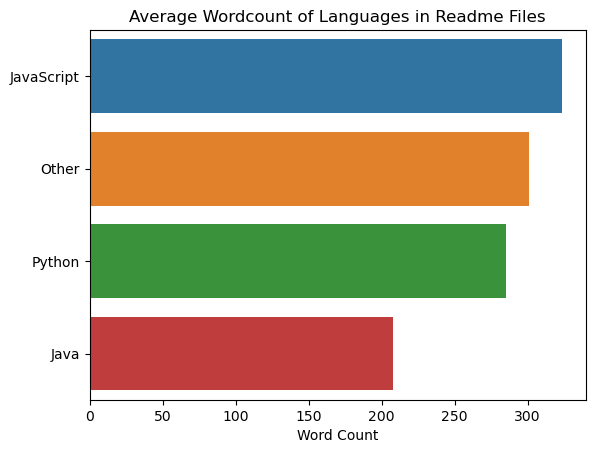

In [19]:
ax = sns.barplot(x=language_wordcount.values, 
                 y=language_wordcount.index)
ax.set(title='Average Wordcount of Languages in Readme Files', xlabel='Word Count', 
      ylabel='')

In [20]:
train['lemmatized'][1]

"minecraft simple minecraftinspired demo written python pyglet httpwwwyoutubecomwatchvkc3lwk631x8 like project might also like minecraft clone written c using modern opengl gl shader language performs better better terrain generation save state sqlite database see httpsgithubcomfoglemancraft goal vision would like see project turn educational tool kid love minecraft python great first language good opportunity get child excited programming code become well commented easily configurable easy make simple change see result quickly think would great turn project library api python package import use configure setup world run something along line python import mc world mcworld worldsetblockx z mcdirt mcrunworld api could contain functionality following easily configurable parameter like gravity jump velocity walking speed etc hook terrain generation run shell pip install pyglet git clone httpsgithubcomfoglemanminecraftgit cd minecraft python mainpy mac mac o x may issue running pyglet 64bit

In [21]:
train.head(2)

,repo,language,readme_contents,clean,lemmatized,word_count
47,danba340/minecraft-freecodecamp,JavaScript,# Welcome to React three fiber Minecraft\n\nTh...,welcome react three fiber minecraft project tr...,welcome react three fiber minecraft project tr...,91
822,BentoBoxWorld/AOneBlock,Java,"# AOneBlock\nA OneBlock Minecraft plugin, writ...",aoneblock oneblock minecraft plugin written ta...,aoneblock oneblock minecraft plugin written ta...,498


In [22]:
#Make dataframes by languages
train_java = train[train.language == 'Java']
train_python = train[train.language == 'Python']
train_javascript = train[train.language == 'JavaScript']
train_other = train[train.language == 'Other']

In [23]:
#Make a variable for the series of lemmatized
java_series = train_java['lemmatized']
python_series = train_python['lemmatized']
javascript_series = train_javascript['lemmatized']
other_series = train_other['lemmatized']

In [25]:
#Make an empty list of words
java_words = []
python_words = []
javascript_words = []
other_words = []

In [26]:
#iterating through the series
#Java
for i in java_series:
    for word in i.split(): #Splitting the sentence into words
        java_words.append(word) #appending each word to the list
#Python
for i in python_series:
    for word in i.split(): #Splitting the sentence into words
        python_words.append(word) #appending each word to the list

#javascript
for i in javascript_series:
    for word in i.split(): #Splitting the sentence into words
        javascript_words.append(word) #appending each word to the list

#other
for i in other_series:
    for word in i.split(): #Splitting the sentence into words
        other_words.append(word) #appending each word to the list

In [27]:
print(java_words)

['aoneblock', 'oneblock', 'minecraft', 'plugin', 'written', 'tastybento', 'credit', 'original', 'idea', 'ijaminecraft', 'build', 'statushttpscicodemcorgbuildstatusiconjobbentoboxworldaoneblockhttpscicodemcorgjobbentoboxworldjobaoneblock', 'bugshttpssonarcloudioapiprojectbadgesmeasureprojectbentoboxworldaoneblockmetricbugshttpssonarcloudiodashboardidbentoboxworldaoneblock', 'reliability', 'ratinghttpssonarcloudioapiprojectbadgesmeasureprojectbentoboxworldaoneblockmetricreliabilityratinghttpssonarcloudiodashboardidbentoboxworldaoneblock', 'line', 'codehttpssonarcloudioapiprojectbadgesmeasureprojectbentoboxworldaoneblockmetricnclochttpssonarcloudiodashboardidbentoboxworldaoneblock', 'aoneblock', 'put', 'block', 'space', 'one', 'block', 'next', 'documentation', 'see', 'bentobox', 'doc', 'docsbentoboxworldhttpsdocsbentoboxworldenlatestgamemodesaoneblockpermissions', 'documentation', 'command', 'user', 'command', 'ob', 'admin', 'command', 'oba', 'faq', 'q', 'phase', '11', 'phase', 'plain', '

In [29]:
#Turning into series based on value counts
java_freq = pd.Series(java_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
javascript_freq = pd.Series(javascript_words).value_counts()
other_freq = pd.Series(other_words).value_counts()

In [30]:
print(java_freq.nlargest(30))

'            845
mod          525
minecraft    476
server       429
build        339
version      320
use          298
project      245
file         242
&#9;         238
code         233
player       220
run          216
support      194
issue        180
feature      171
command      167
using        164
java         163
forge        162
license      161
change       160
make         160
gradle       159
add          157
source       150
also         148
block        147
want         143
1            142
dtype: int64


In [32]:
#Creating string for all
all_python_readme = ' '.join(train_python['lemmatized'])
all_javascript_readme = ' '.join(train_javascript['lemmatized'])
all_java_readme = ' '.join(train_java['lemmatized'])
all_other_readme = ' '.join(train_other['lemmatized'])

In [33]:
all_python_readme

"aternos discord build statushttpstraviscicommekolaosjackaditsvgbranchmasterhttpstraviscicommekolaosjackadit simple tool serve discord bot manage aternos server discord aternos discordaternosondiscord getting startedgettingstarted windowsmaclinux x64windowsmaclinuxx64 raspberry pi armraspberrypiarm prerequisitesprerequisites discord commandsdiscordcommands cloud hosting notecloudhostingnote getting started windowsmaclinux x64 1 git clone repository 2 install using either copy paste execute command inside project folder pip install r requirementstxt alternatively create virtual environment using python venv venv source venvbinactivate finally pip install r requirementstxt 3 setup bot accounthttpsdiscordpyreadthedocsioenlatestdiscordhtml ' need bot token setting bot 4 execute using command inside project folder python3 botpy note running botpy first time ' prompted enter aternos account bot token ' need run python3 botpy finish setting information ever need change information edit env di

In [34]:
#Making into a dataframe
word_counts = (pd.concat([java_freq, python_freq, javascript_freq, other_freq], axis=1, sort=True)
                .set_axis(['java', 'python', 'javascript', 'other'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,java,python,javascript,other
&#9;,238,8,334,263
',845,219,487,838
0,13,61,22,70
00,0,0,1,1
0000,1,0,1,1


In [38]:
word_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22207 entries, &#9; to zzzzzzzzzzzz
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   java        22207 non-null  int64
 1   python      22207 non-null  int64
 2   javascript  22207 non-null  int64
 3   other       22207 non-null  int64
dtypes: int64(4)
memory usage: 867.5+ KB


In [39]:
total_count = (
    pd.concat([java_freq, python_freq, javascript_freq, other_freq], axis=1, sort=True)
    .rename(columns={0: "Java", 1: "Python", 2: "JavaScript", 3: "Other"})
    .fillna(0)
    .apply(lambda col: col.astype(int))
)

In [40]:
total_count

,Java,Python,JavaScript,Other
&#9;,238,8,334,263
',845,219,487,838
0,13,61,22,70
00,0,0,1,1
0000,1,0,1,1
...,...,...,...,...
zweite,0,0,1,0
zweites,0,0,1,0
zyliqx,0,1,0,0
zzz,0,0,0,2


In [44]:
total_count.Java.orderby()

&#9;            238
'               845
0                13
00                0
0000              1
               ... 
zweite            0
zweites           0
zyliqx            0
zzz               0
zzzzzzzzzzzz      0
Name: Java, Length: 22207, dtype: int64

### Bigrams

In [47]:
#all_python_read_me

python_bigrams = nltk.ngrams(all_python_readme.split(), 2)
python_bigrams = pd.Series(list(python_bigrams))

In [54]:
#all_java_read_me

java_bigrams = nltk.ngrams(all_java_readme.split(), 2)
java_bigrams = pd.Series(list(java_bigrams))

In [55]:
#all_javascript_read_me

javascript_bigrams = nltk.ngrams(all_javascript_readme.split(), 2)
javascript_bigrams = pd.Series(list(javascript_bigrams))

In [56]:
#all other read_me
other_bigrams = nltk.ngrams(all_other_readme.split(), 2)
other_bigrams = pd.Series(list(other_bigrams))

### Trigrams

In [57]:
#all_python_read_me

python_trigrams = nltk.ngrams(all_python_readme.split(), 3)
python_trigrams = pd.Series(list(python_trigrams))

In [58]:
#all_java_read_me

java_trigrams = nltk.ngrams(all_java_readme.split(), 3)
java_trigrams = pd.Series(list(python_trigrams))

In [59]:
#all_javascript_read_me

javascript_trigrams = nltk.ngrams(all_javascript_readme.split(), 3)
javascript_trigrams = pd.Series(list(javascript_trigrams))

In [60]:
#all other read_me
other_trigrams = nltk.ngrams(all_other_readme.split(), 3)
other_trigrams = pd.Series(list(other_trigrams))

In [ ]:
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))

In [ ]:
top_20_java_bigrams = (pd.Series(nltk.ngrams(java_words, 2))
                      .value_counts()
                      .head(20))

In [ ]:
top_20_javascript_bigrams = (pd.Series(nltk.ngrams(javascript_words, 2))
                      .value_counts()
                      .head(20))

In [ ]:
top_20_other_bigrams = (pd.Series(nltk.ngrams(other_words, 2))
                      .value_counts()
                      .head(20))

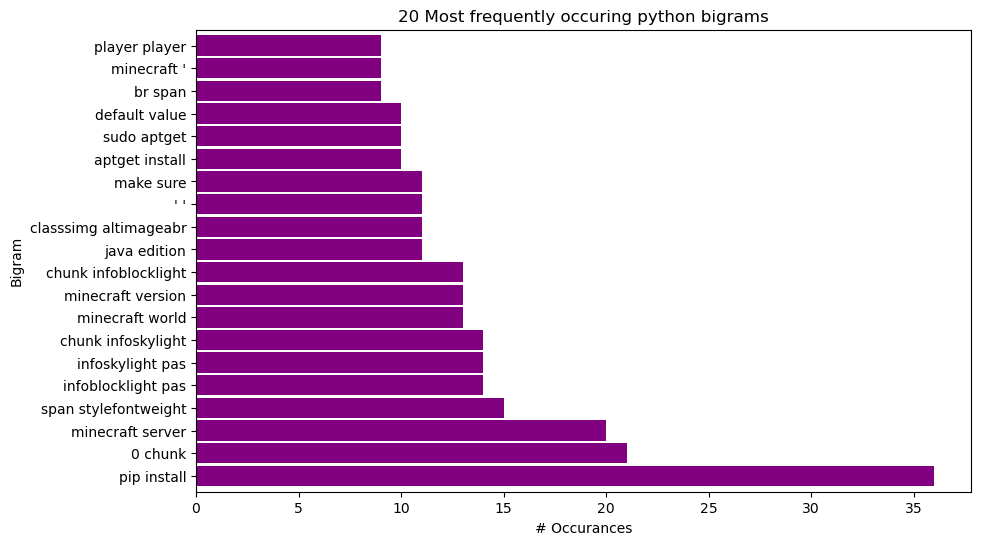

In [71]:
top_20_python_bigrams.sort_values(ascending=False).plot.barh(color='purple', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring python bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


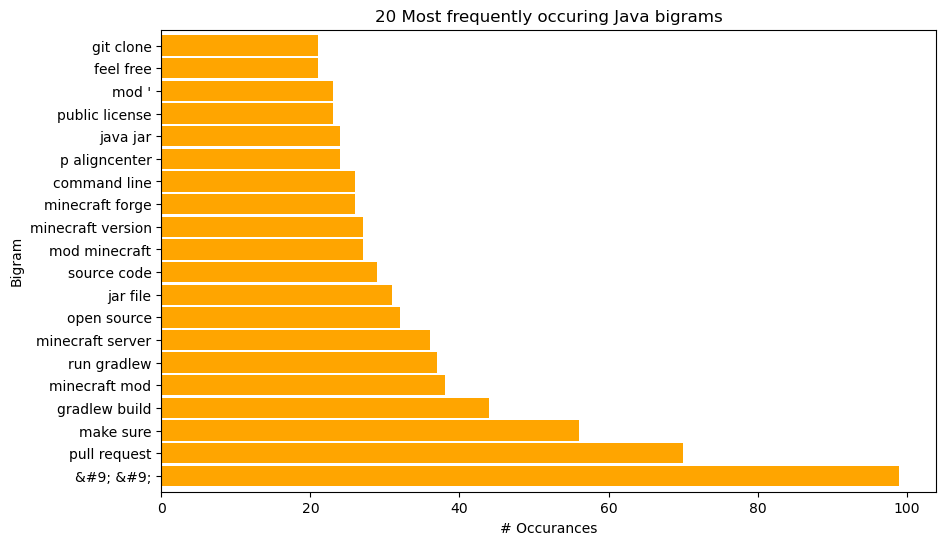

In [76]:
top_20_java_bigrams.sort_values(ascending=False).plot.barh(color='orange', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Java bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_java_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

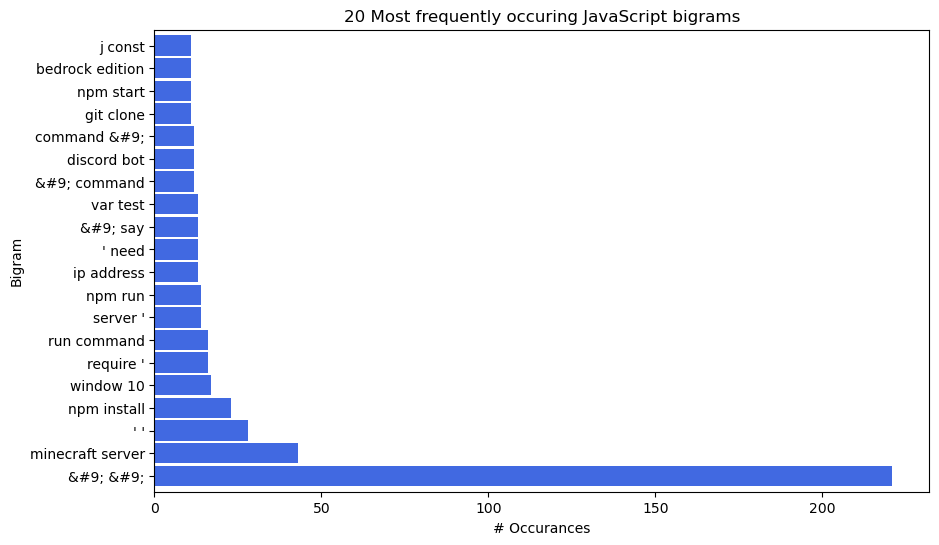

In [75]:
top_20_javascript_bigrams.sort_values(ascending=False).plot.barh(color='royalblue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring JavaScript bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_javascript_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

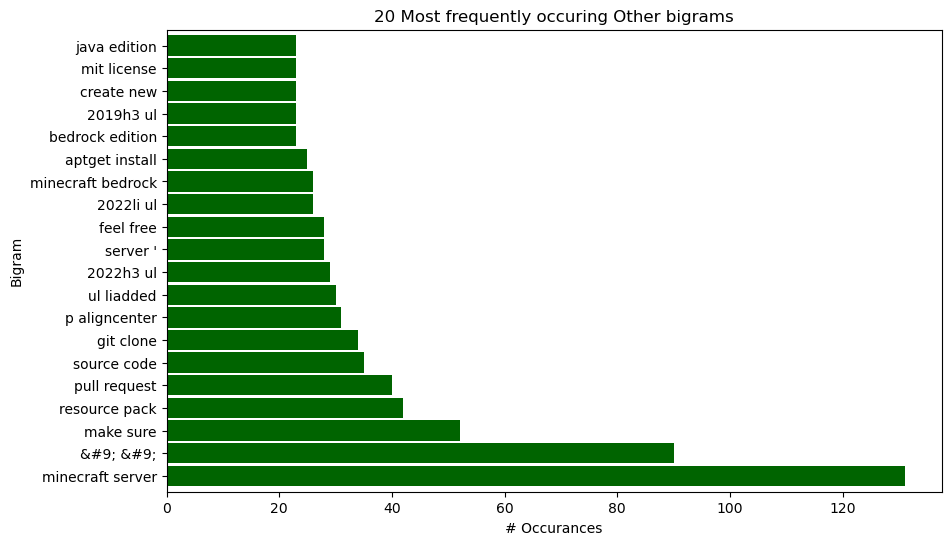

In [77]:
top_20_other_bigrams.sort_values(ascending=False).plot.barh(color='darkgreen', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Other bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_other_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [83]:
#Doing top 10 trigrams
top_10_python_trigrams = (pd.Series(nltk.ngrams(python_words, 3))
                      .value_counts()
                      .head(10))

top_10_java_trigrams = (pd.Series(nltk.ngrams(java_words, 3))
                      .value_counts()
                      .head(10))

top_10_javascript_trigrams = (pd.Series(nltk.ngrams(javascript_words, 3))
                      .value_counts()
                      .head(10))

top_10_other_trigrams = (pd.Series(nltk.ngrams(other_words, 3))
                      .value_counts()
                      .head(10))

In [85]:
top_10_python_trigrams

(chunk, infoskylight, pas)       14
(chunk, infoblocklight, pas)     13
(0, chunk, infoblocklight)       11
(sudo, aptget, install)          10
(classsimg, altimageabr, br)      9
(0, chunk, infoskylight)          8
(pip, install, user)              7
(minecraft, java, edition)        7
(tool, span, spanbr)              6
(install, r, requirementstxt)     6
dtype: int64

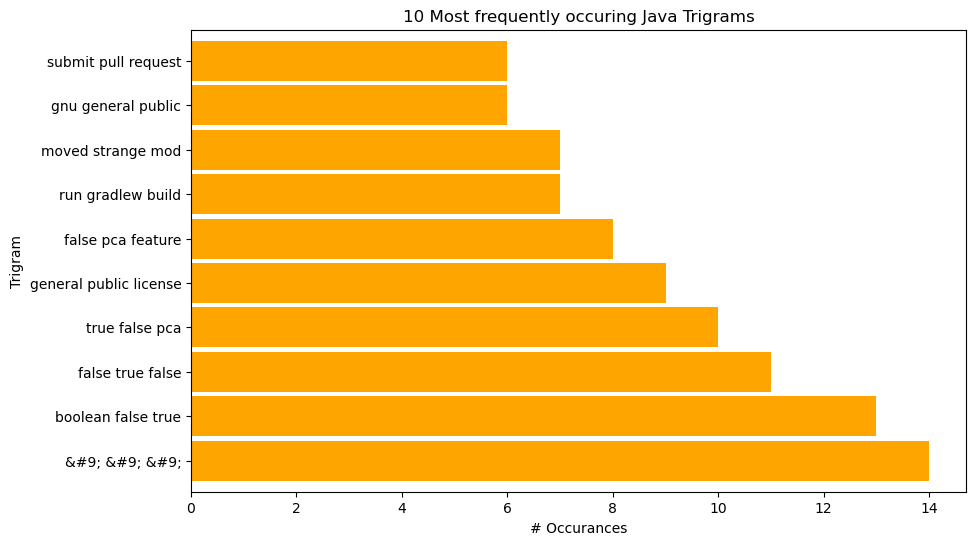

In [87]:
top_10_python_trigrams.sort_values(ascending=False).plot.barh(color='orange', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring Java Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_10_java_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

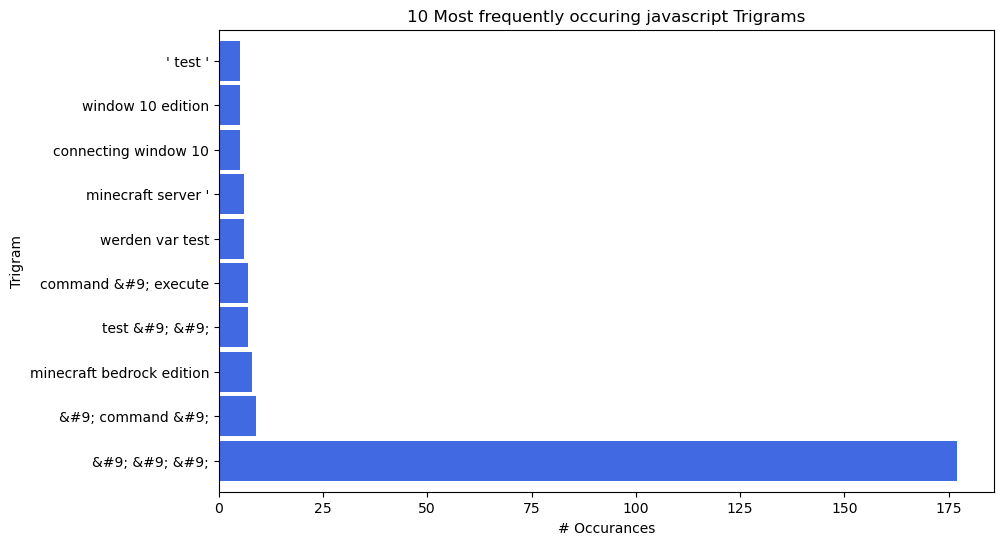

In [88]:
top_10_javascript_trigrams.sort_values(ascending=False).plot.barh(color='royalblue', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring javascript Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_10_javascript_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

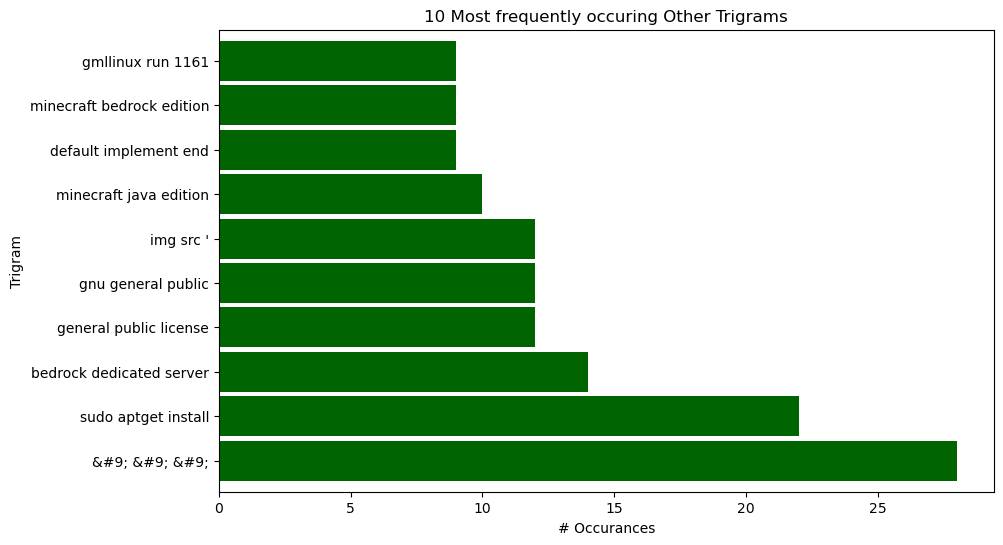

In [89]:
top_10_other_trigrams.sort_values(ascending=False).plot.barh(color='darkgreen', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring Other Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_10_other_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)